<a href="https://colab.research.google.com/github/iamvssrao/FastAI/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

In [4]:
from fastai.vision.all import *
from fastbook import *

In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
path


Path('/root/.fastai/data/mnist_sample')

In [7]:
Path.BASE_PATH = path

In [8]:
!ls


sample_data


In [9]:
!cd sample_data && ls

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [10]:
path.ls()


(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [11]:
(path/"train").ls()

(#2) [Path('train/7'),Path('train/3')]

In [12]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [13]:
len(threes), len(sevens)

(6131, 6265)

In [14]:
im3_path = sevens[4]
im3 = Image.open(im3_path)
im3

In [15]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,64,128,191,255,191
4,0,0,0,0,0,0,0,0,0,128,191,128,255,255,255,255,255,255
5,0,0,0,0,0,0,64,128,255,255,255,255,255,255,255,255,255,255
6,0,0,0,0,64,191,255,255,255,255,255,255,191,128,128,255,255,64
7,0,0,0,0,255,255,255,255,255,255,191,128,0,0,255,255,255,0
8,0,0,0,0,255,255,255,255,128,0,0,0,0,64,255,255,64,0
9,0,0,0,0,191,255,191,0,0,0,0,0,0,191,255,255,0,0


In [16]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [18]:
stacked_threes.ndim

3

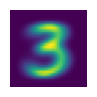

In [19]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

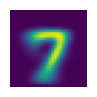

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

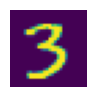

In [21]:
a_3 = stacked_threes[1]
show_image(a_3);

In [22]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [23]:
F.l1_loss(a_3.float(),mean3), F.mse_loss(a_3,mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

Hence the simple mathematical model works !!  (L1 norm (absolute mean error) and L2 norm (root mean squared error))

In [24]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [25]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [26]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [27]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))